# 监督学习-Logistic Regression

根据学生的两次考试成绩,预测学生是否能录取

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1','Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 将训练数据进行可视化

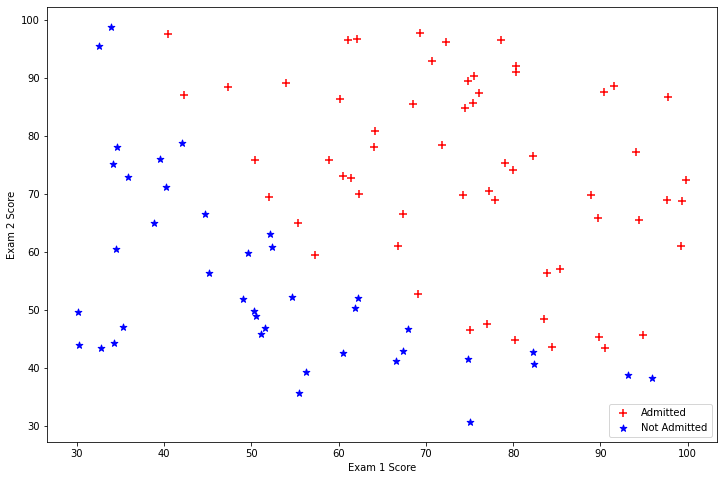

In [159]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='red', marker='+', 
    label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='blue', marker='*',
    label='Not Admitted')
ax.legend(loc=4)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

看起来在两类间，有一个清晰的决策边界。现在我们需要实现逻辑回归，那样就可以训练一个模型来预测结果。

## Sigmoid函数

In [160]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

测试一下是否能合适工作

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

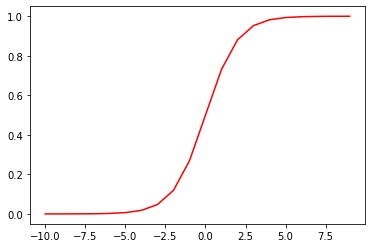

In [161]:
nums_test = np.arange(-10,10, step=1)
plt.plot(nums_test, sigmoid(nums_test),'r')
plt.show
sigmoid(nums_test)

## 代价函数

$$J = \frac{1}{m} \times \sum_{i=1}^m [-y^{(i)} \times log(h_θ(x^{(i)})) - (1 - y^{(i)}) \times log(1 - h_θ(x^{(i)}))]


In [162]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y)
    h_theta = sigmoid(X * theta.T)
    J = -(np.dot((y.T), np.log(h_theta)) + np.dot((1-y.T), np.log(1-h_theta))) / m

    return J
    

设置X,y

In [163]:
data.insert(0,'Ones',1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
#X.shape,theta.shape,y.shape
cost(theta, X, y)

matrix([[0.69314718]])

## 梯度下降

In [164]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(np.dot(X, theta.T)) - y
    grad = np.zeros(parameters)
    # 向量化方法
    # grad = np.dot(X.T, error)/len(y)
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) /len(X)
    
    
    
    return grad

    
gradient(theta, X, y)
##生成matrix/向量化方法,for的话生成的是array



array([ -0.1       , -12.00921659, -11.26284221])

在这里计算的只是单次最开始的梯度,仅仅在计算一个梯度步长,matlab里可以用fminunc(无约束最小化函数)来优化函数,来计算成本和梯度参数,python里面用sciPy的“optimize“命名空间来做一样的事

现在可以使用[sciPy‘s truncated newton(TNC)](https://www.runoob.com/scipy/scipy-optimize.html)实现寻找最优参数.

In [165]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X, y))
theta_results = result[0]
theta_results

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631536E-01   7.89087138E-01
    2    5  5.892425215690646E-01   7.39226659E+01
    3    7  4.227824013349988E-01   1.85265719E+01
    4    9  4.072926963747109E-01   1.68671130E+01
    5   11  3.818854870221429E-01   1.07735103E+01
    6   13  3.786234850041487E-01   2.31584929E+01
tnc: stepmx = 1000
    7   16  2.389268198743758E-01   3.00821998E+00
    8   18  2.047203892405198E-01   1.52227867E-01
    9   20  2.046713898944703E-01   6.62495276E-02
   10   22  2.035303162361215E-01   9.30780876E-04
tnc: fscale = 32.7775
   11   24  2.035293521271775E-01   8.07191978E-06
   12   26  2.035251112915608E-01   1.80213714E-04
   13   28  2.034984109909704E-01   5.02878482E-04
   14   30  2.034978382926864E-01   9.92360567E-06
   15   32  2.034977907837327E-01   3.77843767E-06
   16   34  2.034977388898613E-01   1.94830212E-05
   17   36  2.034977015894746E-01   2.33850311E-13


array([-25.16131863,   0.20623159,   0.20147149])

In [166]:
cost(result[0],X,y)

matrix([[0.2034977]])

## 画出用scipy计算出来的决策边界

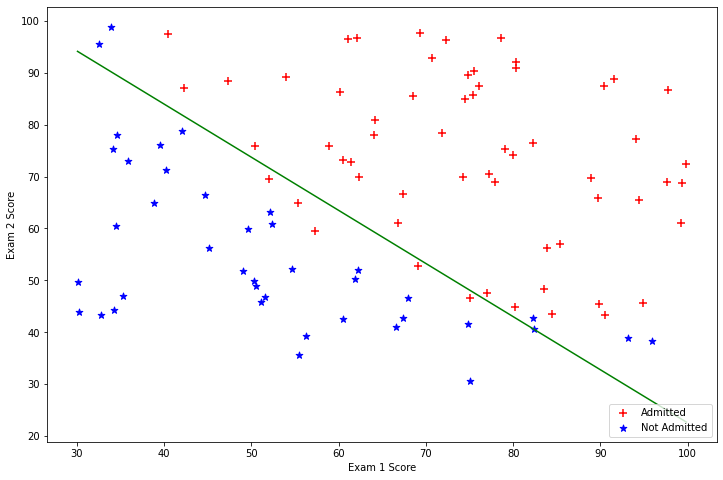

In [167]:
x_1 = np.linspace(data.Exam1.min(), data.Exam1.max(),100)
x_2 = (theta_results[0] + theta_results[1] * x_1) /(-theta_results[2])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='red', marker='+', 
    label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='blue', marker='*',
    label='Not Admitted')
ax.legend(loc=4)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.plot(x_1,x_2,color='green')
plt.show()

编写一个函数,用训练出来的参数theta来为数据集X进行预测,并且给精度打分,h大于等于0.5的时候,y是1,否则是0

In [168]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    #return [1 if x >= 0.5 else 0 for x in probability]
    pre = []
    for x in probability:
        if x >= 0.5:
            pre.append(1)
        else:
            pre.append(0)
    return pre

In [169]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
#predictions = np.array(predictions)
correct = [1 if ((a==1 and b ==1) or (a==0 and b==0)) else 0 
    for (a,b) in zip(predictions,y)]
accuracy = (sum(correct)) % len(y)
print("The accuracy of prediction about the training data is \
{0}%.".format(accuracy))

The accuracy of prediction about the training data is 89%.


89%是训练集的准确率,我们没有保持住了设置或使用交叉验证得到的真实逼近，所以这个数字有可能高于其真实值（这里不是很理解）。

## 正则逻辑回归regularization
防止overfilling出现的一种方法,是成本函数中的一个术语,它使算法更倾向于“更简单的模型”

In [170]:
path2 = 'ex2data2.txt'
data2 = pd.read_csv(path2, header=None,names=['Test1','Test2','Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


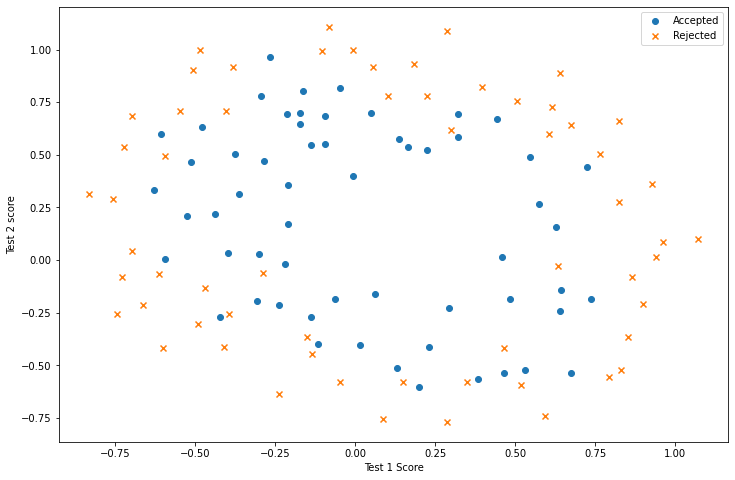

In [171]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 score')
plt.show()

这组数据用线性模型已经不能实现预测数据了,所以进行特征映射,为每组数据创造更多的特征,最高创造到使用6次幂

In [172]:
degree = 5
x1 = data2['Test1']
x2 = data2['Test2']

data2.insert(3,'Ones',1)

for i in range(1,degree+1):
    for j in range(0,i+1):
        data2['F'+str(i-j)+str(j)] = np.power(x1,i-j) * np.power(x2,j)

#axis=1,那么也是横向发生变化，体现为列的减少
data2.drop('Test1',axis=1,inplace=True)
data2.drop('Test2',axis=1,inplace=True)
data2.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F31,F22,F13,F04,F50,F41,F32,F23,F14,F05
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000094,0.001286,0.017551,0.239497,3.541519e-07,0.000005,0.000066,0.000900,0.012278,0.167542
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,-0.000546,0.004035,-0.029801,0.220095,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412,0.150752
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,-0.006757,0.021886,-0.070895,0.229642,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077,0.158970
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,-0.026483,0.035465,-0.047494,0.063602,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851,0.031940
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,-0.062956,0.057116,-0.051818,0.047011,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128,0.021890


为了防止出现过拟合情况,所以需要进行正则化,根据正则化来定义成本函数和梯度函数.

对逻辑回归,使用正则化  
$$J = \frac{1}{m} \times \sum_{i=1}^m [-y^{(i)} \times log(h_θ(x^{(i)})) - (1 - y^{(i)}) \times log(1 - h_θ(x^{(i)}))] + \frac{λ}{2m} \sum_{j=1}^n θ_{(j)}^{(2)}


In [173]:
def costReg(theta, X, y, regpara):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    h = sigmoid(X * theta.T)
    reg = regpara * np.sum(np.power(theta[:,1:theta.shape[1]],2)) / (2 * len(y))
    #返回的是matrix
    #J = (-y.T * np.log(h) - (1-y.T) * np.log(1-h)) / len(y) + reg 
    #返回的是一个数字
    first = np.multiply(-y, np.log(h))
    second = np.multiply((1-y), np.log(1-h))

    return np.sum(first - second) /len(X) +reg

对这个reg项里的regpara,也就是lambda是一个超参数,用来控制正则化项,添加正则化梯度函数.theta0不需要进行正则化

In [174]:
def gradientReg(theta, X, y, regpara):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    #theta参数的个数
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if i == 0:
            grad[i] = np.sum(term) / len(y)
        else:
            grad[i] = np.sum(term) / len(y) + regpara / (2 * len(y)) 
    return grad

参考第一部分,来对模型进行计算

In [175]:
cols = data2.shape[1]
X2 = data2.iloc[:, 1:cols]
y2 = data2.iloc[:, 0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(cols-1)

设置一个合理的初始学习率

In [176]:
regpara = 1

进行计算/训练

In [177]:
costReg(theta2, X2, y2, regpara)

0.6931471805599454

In [178]:
gradientReg(theta2, X2, y2, regpara)

array([0.00847458, 0.02302538, 0.00431506, 0.05458193, 0.01573862,
       0.04190214, 0.02259328, 0.01156122, 0.01242973, 0.02771378,
       0.04358591, 0.00647653, 0.01709734, 0.00733323, 0.04354011,
       0.02420803, 0.00856712, 0.00762373, 0.01007551, 0.00871358,
       0.03524527])

利用之前的scipy的opt,fmin_tnc来进行优化

In [179]:
result2 = opt.fmin_tnc(func=costReg,x0=theta2, fprime=gradientReg,args=(X2, y2, regpara))
result2

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.34906863E-02
    1   34  6.146863947290910E-01   3.49532870E-03
    1   85  6.146863947290910E-01   3.49532870E-03
tnc: Linear search failed


(array([ 1.92465739,  1.53694801,  2.51353603, -3.57157105, -1.26283149,
        -2.1161696 ,  0.16805599, -0.82845809, -0.7775084 , -0.34464228,
        -2.76966851, -0.44842837, -1.42073961, -0.61829983, -2.20083923,
        -0.58061019, -0.76097023, -0.56663072, -0.86810904, -0.7675659 ,
        -1.13607032]),
 86,
 4)

画图表示出来

In [180]:
theta_min2 = np.matrix(result2[0])
predictions = predict(theta_min2, X2)
correct = [1 if (a == 1 and b == 1) or (a == 0 and b == 0) else 0 
    for (a,b) in zip(predictions,y2)]
accuracy = sum(correct) % len(correct)
theta_min2,accuracy

(matrix([[ 1.92465739,  1.53694801,  2.51353603, -3.57157105, -1.26283149,
          -2.1161696 ,  0.16805599, -0.82845809, -0.7775084 , -0.34464228,
          -2.76966851, -0.44842837, -1.42073961, -0.61829983, -2.20083923,
          -0.58061019, -0.76097023, -0.56663072, -0.86810904, -0.7675659 ,
          -1.13607032]]),
 95)

## 画出决策边界

In [181]:
def hfun2(theta,x1,x2):
    """计算每个给定的x1,x2的函数结果"""
    temp = theta[0][0,0]
    place = 0
    for i in range(1,degree+1):
        for j in range(0,i+1):
            temp += np.power(x1,i-j) * np.power(x2,j) * theta[0][0,place+1]
            place += 1
    return temp

In [182]:
def find_descision_boundary(theta):
    """提取出来合适的x1和x2"""
    x1 = np.linspace(-1, 1.5, 1000)
    x2 = np.linspace(-1, 1.5, 1000)
    cordinates = [(x,y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)
    hval = pd.DataFrame({'x1': x_cord, 'x2': y_cord})
    hval['hval'] =hfun2(theta,hval.x1,hval.x2)

    descision = hval[np.abs(hval['hval']) < 2 * 10**-3]

    return descision.x1, descision.x2

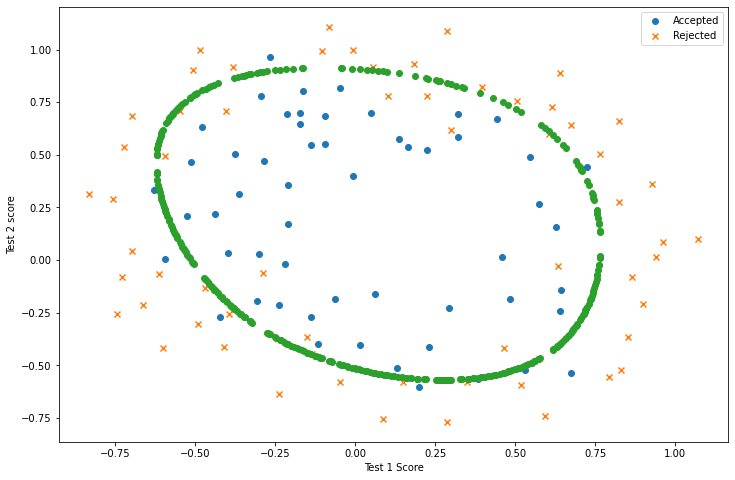

In [183]:
x,y = find_descision_boundary(theta_min2)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 score')
plt.scatter(x,y)
plt.show()

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.05270539E+00
    1   42  6.913807737307662E-01   1.05032829E+00
    1   96  6.913807737307662E-01   1.05032829E+00
tnc: Linear search failed


The accuracy is 92%


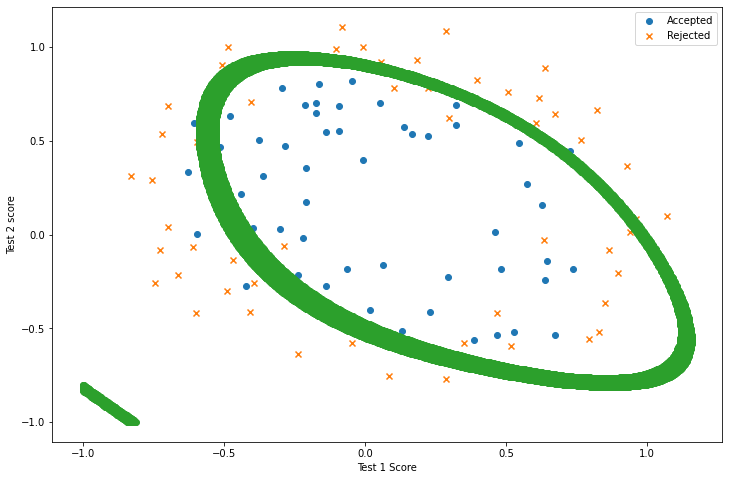

In [184]:
regpara = 50
result2 = opt.fmin_tnc(func=costReg,x0=theta2, fprime=gradientReg,args=(X2, y2, regpara))
theta_min2 = np.matrix(result2[0])
predictions = predict(theta_min2, X2)
correct = [1 if (a == 1 and b == 1) or (a == 0 and b == 0) else 0 
    for (a,b) in zip(predictions,y2)]
accuracy = sum(correct) % len(correct)
print("The accuracy is {}%".format(accuracy))
x,y = find_descision_boundary(theta_min2)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 score')
plt.scatter(x,y)
plt.show()


# 使用sklearn进行逻辑回归

In [185]:
from sklearn import linear_model
model =linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2,y2)
model.score(X2,y2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8389830508474576